In [1]:
import cobra
import os
from matplotlib_venn import venn2, venn3
model_path = "/home/mac9jc/paradigm/models"
os.chdir(model_path)


# Matplotlib defaults
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mticker
matplotlib.rcParams["savefig.dpi"] = 300
matplotlib.rcParams['figure.dpi'] = 300
#Rivanna fonts should include sans-serif now, but this could still raise an error
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

SMALLER_SIZE = 8
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# evaluate gapfilling using P. falciparum 3D7 model

Here, we will compare the reactions added by gapfilling the draft P. fal 3D7 model to the reactions added by orthology curation of the draft P. fal 3D7 model.

This will allow us to evaluate the coverage of the gapfilling process.

First, load models.

In [2]:
draft_model = cobra.io.load_json_model('final_denovo_Pfalciparum3D7.json')
gf_draft_model = cobra.io.read_sbml_model('gf_no_ortho_Pfalciparum3D7.xml')
curated_model = cobra.io.read_sbml_model('ortho_Pfalciparum3D7.xml')
gf_curated_model = cobra.io.read_sbml_model('gf_Pfalciparum3D7.xml')

In [3]:
rxns_draft_model = [r.id for r in draft_model.reactions]
rxns_gf_draft_model = [r.id for r in gf_draft_model.reactions]
rxns_curated_model = [r.id for r in curated_model.reactions]
rxns_gf_curated_model = [r.id for r in gf_curated_model.reactions]

these are the reactions added in the gapfilling process to the draft model:

In [4]:
rxns_added_through_gf = set(rxns_gf_draft_model).difference(set(rxns_draft_model))

these are the reactions added in the gapfilling process to the curated model:

In [5]:
rxns_added_through_gf_curated = set(rxns_gf_curated_model).difference(set(rxns_curated_model))

these are the reactions added in the curation process:

In [6]:
rxns_added_through_curation = set(rxns_curated_model).difference(set(rxns_draft_model))

these reactions were added through the multistep process:

In [7]:
rxns_added_overall = set(rxns_gf_curated_model).difference(set(rxns_draft_model))

plot:

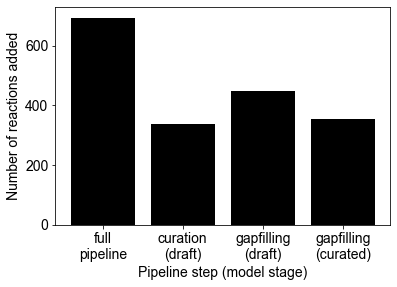

In [8]:
fig,ax = plt.subplots()

ax.bar(['full\npipeline', 'curation\n(draft)', 'gapfilling\n(draft)', 'gapfilling\n(curated)'],
       [len(rxns_added_overall),len(rxns_added_through_curation),len(rxns_added_through_gf),len(rxns_added_through_gf_curated)],
       color = "black")
ax.set_ylabel('Number of reactions added')
ax.set_xlabel('Pipeline step (model stage)')
plt.show()

fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/Pf3D7_reactions_added_model_step.svg")
fig.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/Pf3D7_reactions_added_model_step.png")

redo with all plasmodium models:

In [9]:
plasmodium_species = ["PadleriG01","PbergheiANKA","PbillcollinsiG01","PblacklockiG01",
                      "Pchabaudichabaudi","PcoatneyiHackeri","PcynomolgiB","PcynomolgiM",
                      "Pfalciparum3D7","Pfalciparum7G8","PfalciparumCD01","PfalciparumDd2",
                      "PfalciparumGA01","PfalciparumGB4","PfalciparumGN01","PfalciparumHB3",
                      "PfalciparumIT","PfalciparumKE01","PfalciparumKH01","PfalciparumKH02",
                      "PfalciparumML01","PfalciparumSD01","PfalciparumSN01","PfalciparumTG01",
                      "PfragileNilgiri","PgaboniG01","PgaboniSY75","Pgallinaceum8A","PinuiSanAntonio1",
                      "PknowlesiH","PknowlesiMalayanPk1A","PmalariaeUG01","PovalecurtisiGH01",
                      "PpraefalciparumG01","PreichenowiCDC","PreichenowiG01","PrelictumSGS1-like",
                      "PvinckeipetteriCR","Pvinckeivinckeivinckei",#"Pvivax-likePvl01",
                      "PvivaxP01","PvivaxSal1","Pyoeliiyoelii17X","Pyoeliiyoelii17XNL","PyoeliiyoeliiYM"]
n_rxns_added_through_gf = []
n_rxns_added_through_gf_curated = []
n_rxns_added_through_curation = []
n_rxns_added_overall = []
n_rxns_total = []


In [10]:
for x in plasmodium_species:
    #print(x)
    draft_model = cobra.io.load_json_model('final_denovo_'+x+'.json')
    gf_draft_model = cobra.io.read_sbml_model('gf_no_ortho_'+x+'.xml')
    curated_model = cobra.io.read_sbml_model('ortho_'+x+'.xml')
    gf_curated_model = cobra.io.read_sbml_model('gf_'+x+'.xml')
    
    rxns_draft_model = [r.id for r in draft_model.reactions]
    rxns_gf_draft_model = [r.id for r in gf_draft_model.reactions]
    rxns_curated_model = [r.id for r in curated_model.reactions]
    rxns_gf_curated_model = [r.id for r in gf_curated_model.reactions]
    
    rxns_added_through_gf = set(rxns_gf_draft_model).difference(set(rxns_draft_model))
    rxns_added_through_gf_curated = set(rxns_gf_curated_model).difference(set(rxns_curated_model))
    rxns_added_through_curation = set(rxns_curated_model).difference(set(rxns_draft_model))
    rxns_added_overall = set(rxns_gf_curated_model).difference(set(rxns_draft_model))
    total_rxns = rxns_gf_curated_model
    
    n_rxns_added_through_gf.append(len(rxns_added_through_gf))
    n_rxns_added_through_gf_curated.append(len(rxns_added_through_gf_curated))
    n_rxns_added_through_curation.append(len(rxns_added_through_curation))
    n_rxns_added_overall.append(len(rxns_added_overall))
    n_rxns_total.append(len(total_rxns))


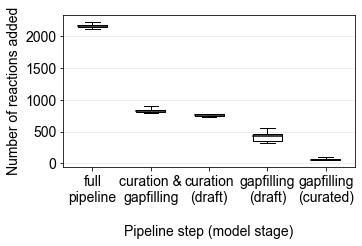

In [15]:
fig,ax = plt.subplots()
x = ['full\npipeline', 'curation &\ngapfilling','curation\n(draft)', 'gapfilling\n(draft)', 'gapfilling\n(curated)']
bplot = ax.boxplot([n_rxns_total,n_rxns_added_overall, 
        n_rxns_added_through_curation, 
        n_rxns_added_through_gf, 
        n_rxns_added_through_gf_curated],
                   showfliers=False, patch_artist=True,
                   medianprops = dict(color="black",linewidth=1.5), labels = x) 
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)
colors = ["white","white","white","white","white"]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
plt.subplots_adjust(bottom = 0.35)
ax.set_ylabel('Number of reactions added')
ax.set_xlabel('\nPipeline step (model stage)')
plt.subplots_adjust(right = 0.8)

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/reactions_added_model_step.png")

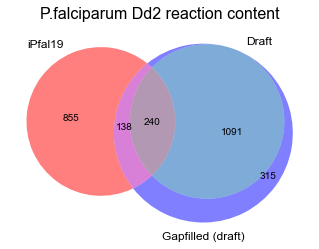

In [16]:
well_curated_model = cobra.io.read_sbml_model('iPfal19.xml')
draft_model = cobra.io.load_json_model('final_denovo_PfalciparumDd2.json')
gf_curated_model = cobra.io.read_sbml_model('gf_no_ortho_PfalciparumDd2.xml')

#A
plt.figure()
A = set([r.id for r in well_curated_model.reactions])
#B
B = set([r.id for r in draft_model.reactions])
#C
C = set([r.id for r in gf_curated_model.reactions])
Abc = len(A.difference(B).difference(C))
aBc = len(B.difference(A).difference(C))
ABc = len(A.intersection(B).difference(C))
abC = len(C.difference(A).difference(B))
AbC = len(A.intersection(C).difference(B))
aBC = len(B.intersection(C).difference(A))
ABC = len(A.intersection(B).intersection(C))

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
      set_labels = ('iPfal19', 'Draft', 'Gapfilled (draft)'), alpha = 0.5)
plt.title("P.falciparum Dd2 reaction content")

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_Dd2_reactions_gf_only.png")

/home/mac9jc/.conda/envs/paradigm_env/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117 UserWarning: Bad circle positioning


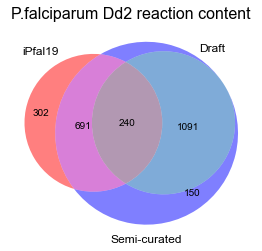

In [17]:
gf_curated_model = cobra.io.read_sbml_model('gf_PfalciparumDd2.xml')

#A
plt.figure()
A = set([r.id for r in well_curated_model.reactions])
#B
B = set([r.id for r in draft_model.reactions])
#C
C = set([r.id for r in gf_curated_model.reactions])
Abc = len(A.difference(B).difference(C))
aBc = len(B.difference(A).difference(C))
ABc = len(A.intersection(B).difference(C))
abC = len(C.difference(A).difference(B))
AbC = len(A.intersection(C).difference(B))
aBC = len(B.intersection(C).difference(A))
ABC = len(A.intersection(B).intersection(C))

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
      set_labels = ('iPfal19', 'Draft', 'Semi-curated'), alpha = 0.5)
plt.title("P.falciparum Dd2 reaction content")

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_Dd2_reactions.png")

In [18]:
exchange = list()
transporter = list()
enzyme = list()
for r in A.difference(B).difference(C):
    rxn = well_curated_model.reactions.get_by_id(r)
    products = [m.id.split('_')[0] for m in rxn.products]
    reactants = [m.id.split('_')[0] for m in rxn.reactants]
    if len(products) == 0 or len(reactants) == 0:
        exchange.append(r)
    elif set(products) == set(reactants):
        transporter.append(r)
    else:
        enzyme.append(r)
percent_enzymes = len(enzyme)/len(A.difference(B).difference(C))
percent_transporter = len(transporter)/len(A.difference(B).difference(C))
print('exclusively in iPfal19')
print(percent_enzymes)
print(percent_transporter)

exclusively in iPfal19
0.2052980132450331
0.5562913907284768


In [19]:
exchange = list()
transporter = list()
enzyme = list()
for r in C.difference(A):
    rxn = gf_curated_model.reactions.get_by_id(r)
    products = [m.id.split('_')[0] for m in rxn.products]
    reactants = [m.id.split('_')[0] for m in rxn.reactants]
    if len(products) == 0 or len(reactants) == 0:
        exchange.append(r)
    elif set(products) == set(reactants):
        transporter.append(r)
    else:
        enzyme.append(r)
percent_enzymes = len(enzyme)/len(C.difference(A))
percent_transporter = len(transporter)/len(C.difference(A))
print('not in iPfal19')
print(percent_enzymes)
print(percent_transporter)

not in iPfal19
0.8605962933118453
0.048348106365834004


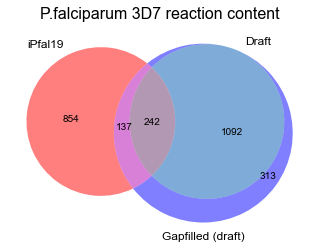

In [20]:
draft_model = cobra.io.load_json_model('final_denovo_Pfalciparum3D7.json')
gf_curated_model = cobra.io.read_sbml_model('gf_no_ortho_Pfalciparum3D7.xml')

#A
plt.figure()
A = set([r.id for r in well_curated_model.reactions])
#B
B = set([r.id for r in draft_model.reactions])
#C
C = set([r.id for r in gf_curated_model.reactions])
Abc = len(A.difference(B).difference(C))
aBc = len(B.difference(A).difference(C))
ABc = len(A.intersection(B).difference(C))
abC = len(C.difference(A).difference(B))
AbC = len(A.intersection(C).difference(B))
aBC = len(B.intersection(C).difference(A))
ABC = len(A.intersection(B).intersection(C))

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
      set_labels = ('iPfal19', 'Draft', 'Gapfilled (draft)'), alpha = 0.5)

plt.title("P.falciparum 3D7 reaction content")

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_3D7_reactions_gf_only.png")

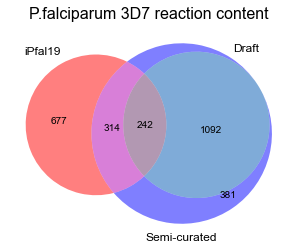

In [21]:

gf_curated_model = cobra.io.read_sbml_model('gf_Pfalciparum3D7.xml')

#A
plt.figure()
A = set([r.id for r in well_curated_model.reactions])
#B
B = set([r.id for r in draft_model.reactions])
#C
C = set([r.id for r in gf_curated_model.reactions])
Abc = len(A.difference(B).difference(C))
aBc = len(B.difference(A).difference(C))
ABc = len(A.intersection(B).difference(C))
abC = len(C.difference(A).difference(B))
AbC = len(A.intersection(C).difference(B))
aBC = len(B.intersection(C).difference(A))
ABC = len(A.intersection(B).intersection(C))

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
      set_labels = ('iPfal19', 'Draft', 'Semi-curated'), alpha = 0.5)

plt.title("P.falciparum 3D7 reaction content")

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_3D7_reactions.png")

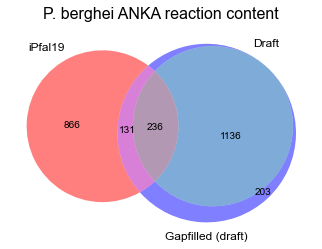

In [22]:
draft_model = cobra.io.load_json_model('final_denovo_PbergheiANKA.json')
gf_curated_model = cobra.io.read_sbml_model('gf_no_ortho_PbergheiANKA.xml')

#A
plt.figure()
A = set([r.id for r in well_curated_model.reactions])
#B
B = set([r.id for r in draft_model.reactions])
#C
C = set([r.id for r in gf_curated_model.reactions])
Abc = len(A.difference(B).difference(C))
aBc = len(B.difference(A).difference(C))
ABc = len(A.intersection(B).difference(C))
abC = len(C.difference(A).difference(B))
AbC = len(A.intersection(C).difference(B))
aBC = len(B.intersection(C).difference(A))
ABC = len(A.intersection(B).intersection(C))

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
      set_labels = ('iPfal19', 'Draft', 'Gapfilled (draft)'), alpha = 0.5)


plt.title("P. berghei ANKA reaction content")

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_berghei_reactions_gf_only.png")

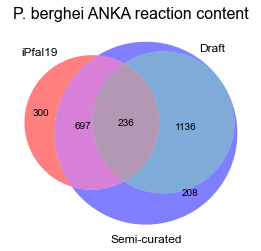

In [23]:
gf_curated_model = cobra.io.read_sbml_model('gf_PbergheiANKA.xml')

#A
plt.figure()
A = set([r.id for r in well_curated_model.reactions])
#B
B = set([r.id for r in draft_model.reactions])
#C
C = set([r.id for r in gf_curated_model.reactions])
Abc = len(A.difference(B).difference(C))
aBc = len(B.difference(A).difference(C))
ABc = len(A.intersection(B).difference(C))
abC = len(C.difference(A).difference(B))
AbC = len(A.intersection(C).difference(B))
aBC = len(B.intersection(C).difference(A))
ABC = len(A.intersection(B).intersection(C))

#(Abc, aBc, ABc, abC, AbC, aBC, ABC)
venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
      set_labels = ('iPfal19', 'Draft', 'Semi-curated'), alpha = 0.5)


plt.title("P. berghei ANKA reaction content")

plt.savefig("/home/mac9jc/paradigm/data/results/figures_for_reviewers/venn_berghei_reactions.png")